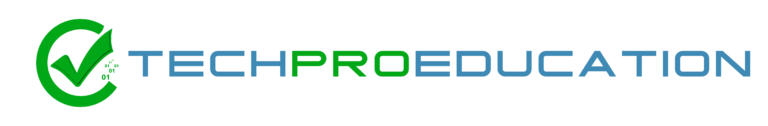

# Classification

<span class="girk">We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.</span>

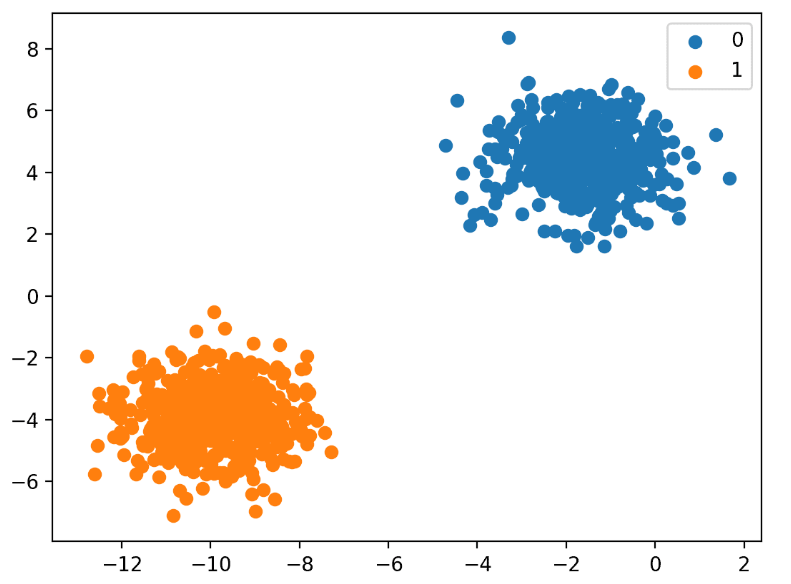

## Import  libraries & data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# ilgili kütüphanelerin tümü
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

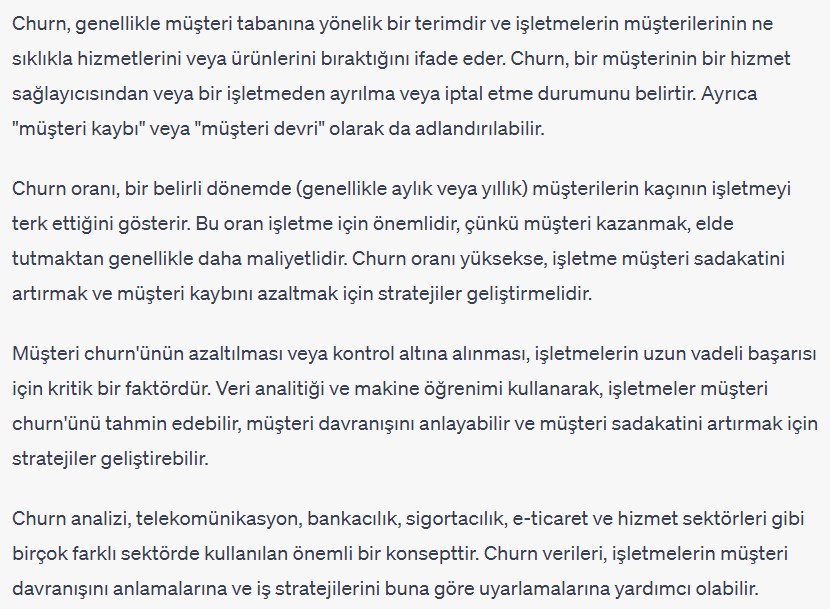

In [3]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
df.head()
#Tenure:Number of years for which the customer has been with the bank
#NumOfProducts :Number of bank products the customer is utilising
#Binary flag 1 if the customer closed account with bank and 0 if the customer is retained
#"RowNumber" sütunu indeks olarak belirleniyor

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


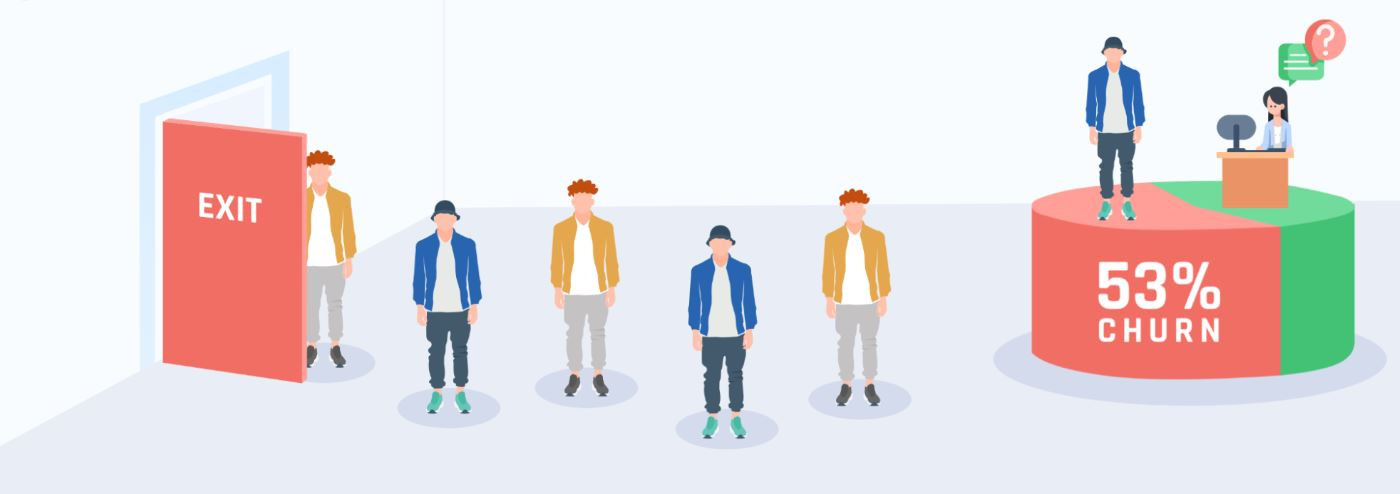

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 13)

In [5]:
df.isnull().sum().any()

False

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [8]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [9]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

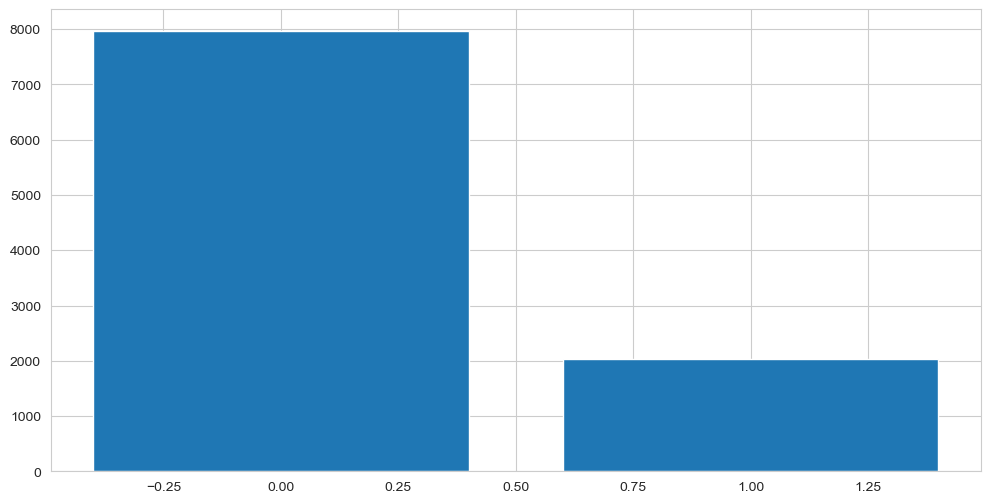

In [10]:
value_counts = df['Exited'].value_counts()

plt.bar(value_counts.index, value_counts.values);

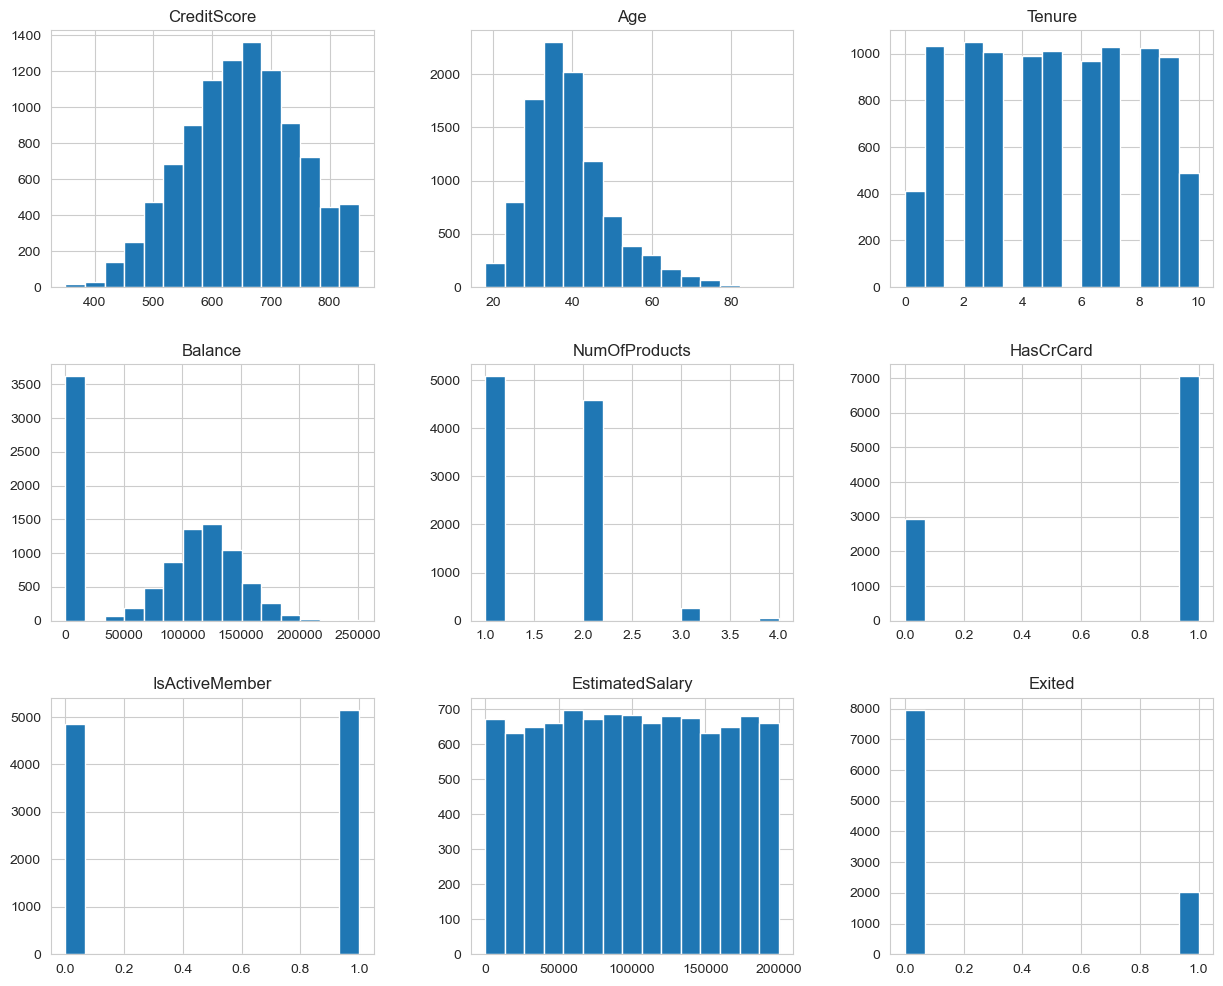

In [11]:
df.hist(figsize=(15, 12), bins=15);

In [13]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

ValueError: could not convert string to float: 'France'

<Figure size 1600x1200 with 0 Axes>

In [ ]:
# yukarıda ki kodda hata alanlar alt satırda ki kodu çalıştırsın

<Axes: >

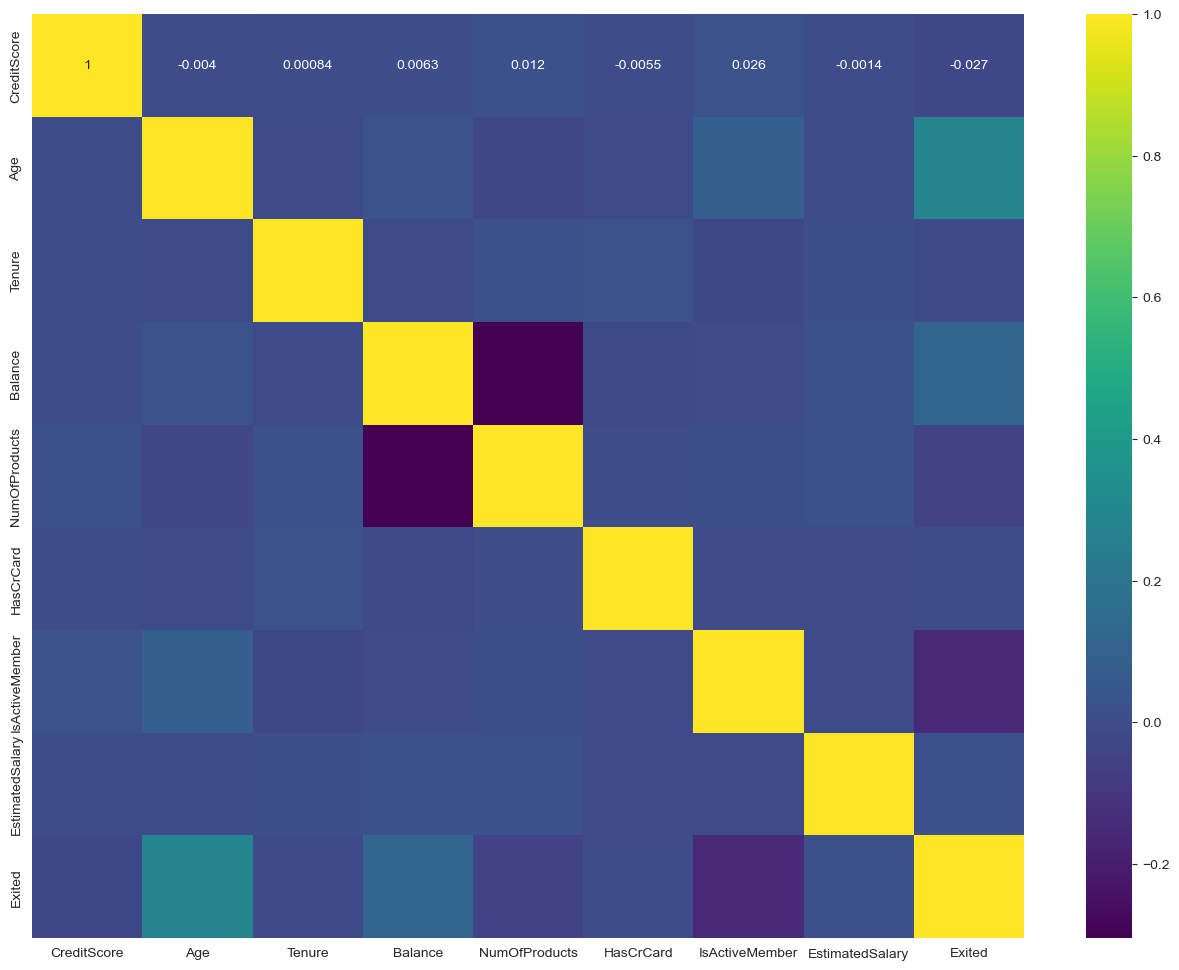

In [12]:
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis')

In [15]:
df.corr()['Exited'][:-1].sort_values().plot.barh()

ValueError: could not convert string to float: 'France'

In [16]:
# yukarıda ki kodda hata alanlar alt satırda ki kodu çalıştırsın

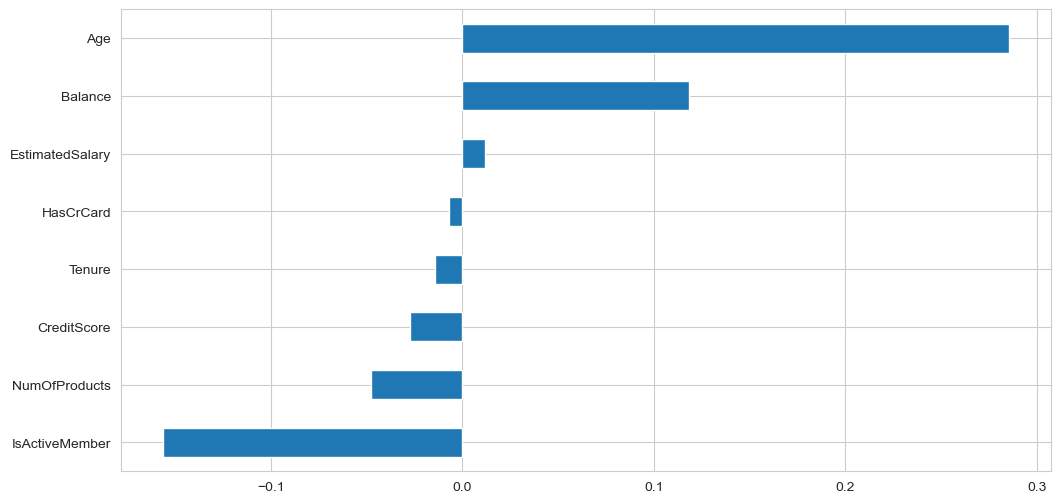

In [13]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_series = numerical_df.corr()['Exited'][:-1].sort_values()
correlation_series.plot.barh();

In [14]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,False,False,False
2,608,41,1,83807.860,1,0,1,112542.580,0,False,True,False
3,502,42,8,159660.800,3,1,0,113931.570,1,False,False,False
4,699,39,1,0.000,2,0,0,93826.630,0,False,False,False
5,850,43,2,125510.820,1,1,1,79084.100,0,False,True,False


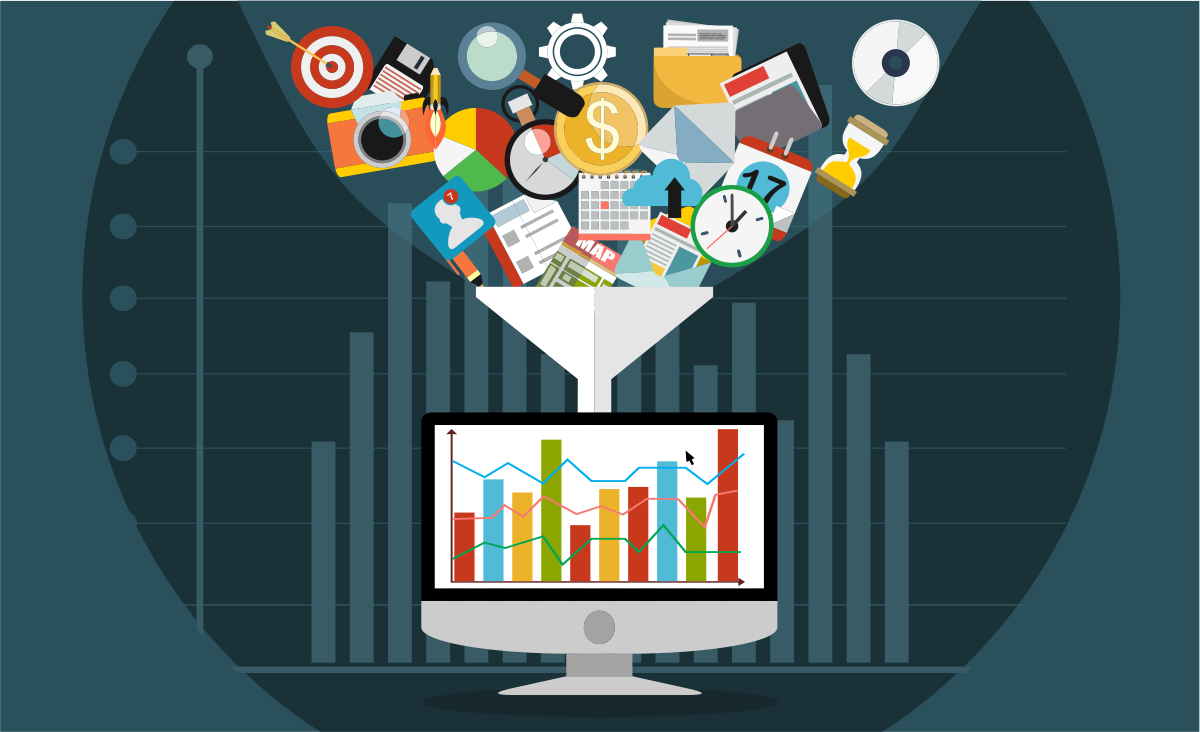

## Preprocessing of Data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)


In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

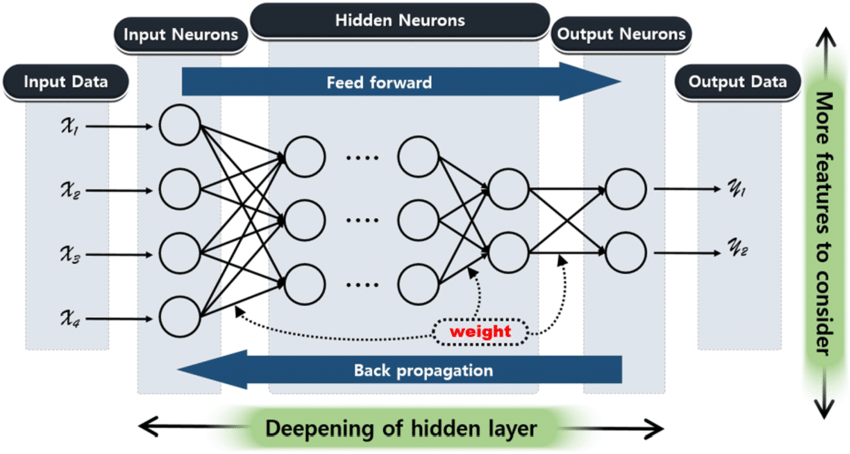

## Modelling & Model Performance

### without class_weigth

In [23]:
X_train.shape

(9000, 11)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [25]:
from tensorflow.keras.optimizers import Adam

In [27]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

# Recall — the percentage of positive cases you caught
# Recall, false negative’in gözardı edilemez olduğu durumlarda önemli bir metrik. recall = TP / TP +FN
# Recall’a bakma sebebimiz tamamiyle paydadaki false negative’ler, yani hesabına devam ettiği tahmin edilen ve hesabını kapatan insanlar. 

In [28]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=90)

In [29]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - Recall: 0.3721 - loss: 0.6106 - val_Recall: 0.2818 - val_loss: 0.4651
Epoch 2/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.2687 - loss: 0.4330 - val_Recall: 0.4696 - val_loss: 0.3716
Epoch 3/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.3538 - loss: 0.4035 - val_Recall: 0.4696 - val_loss: 0.3343
Epoch 4/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.3838 - loss: 0.3860 - val_Recall: 0.4807 - val_loss: 0.3117
Epoch 5/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.3975 - loss: 0.3763 - val_Recall: 0.5691 - val_loss: 0.3076
Epoch 6/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.4098 - loss: 0.3590 - val_Recall: 0.5304 - val_loss: 0.3016
Epoch 7/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.4052 - loss: 0.3752 - val_Recall: 0.4917 - val_loss: 0.3096
Epoch 8/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.4368 - loss: 0.3547 - val_Recall: 0.4530 - val_loss: 0.3249


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,341 (48.21 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 240 (960.00 B)

 Optimizer params: 8,068 (31.52 KB)

In [31]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,Recall,loss,val_Recall,val_loss
0,0.291,0.522,0.282,0.465
1,0.285,0.430,0.470,0.372
2,0.369,0.399,0.470,0.334
3,0.379,0.387,0.481,0.312
4,0.400,0.374,0.569,0.308


<Axes: >

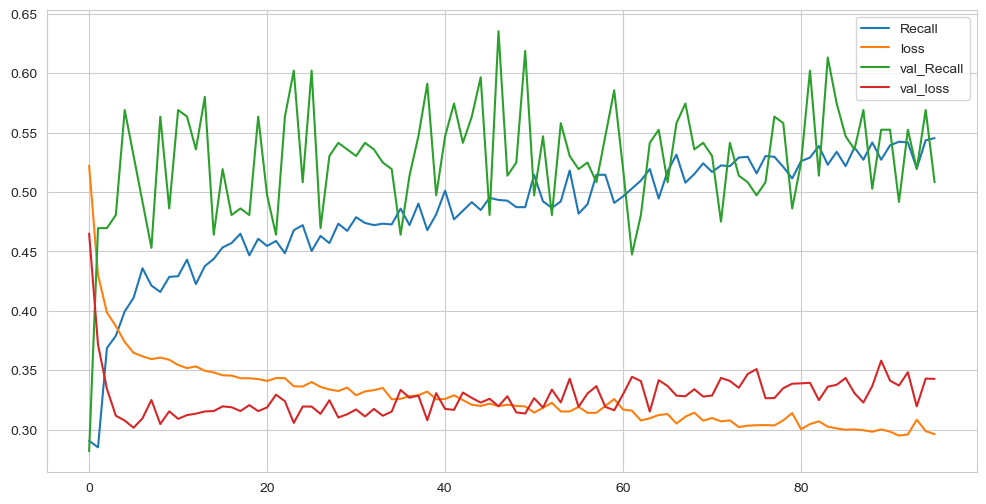

In [32]:
loss_df.plot()

In [33]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
[[752  44]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       796
           1       0.67      0.44      0.53       204

    accuracy                           0.84      1000
   macro avg       0.77      0.69      0.72      1000
weighted avg       0.83      0.84      0.83      1000



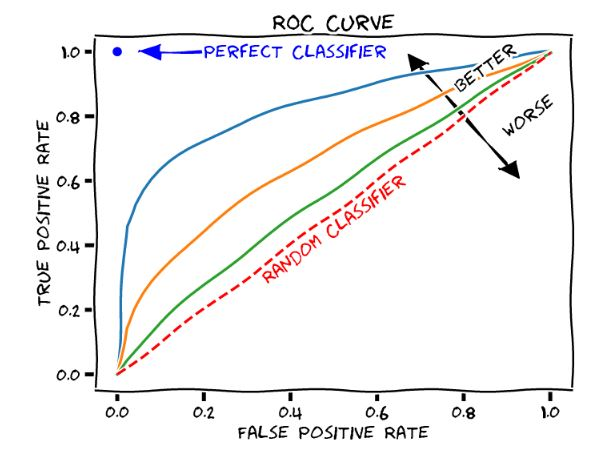

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


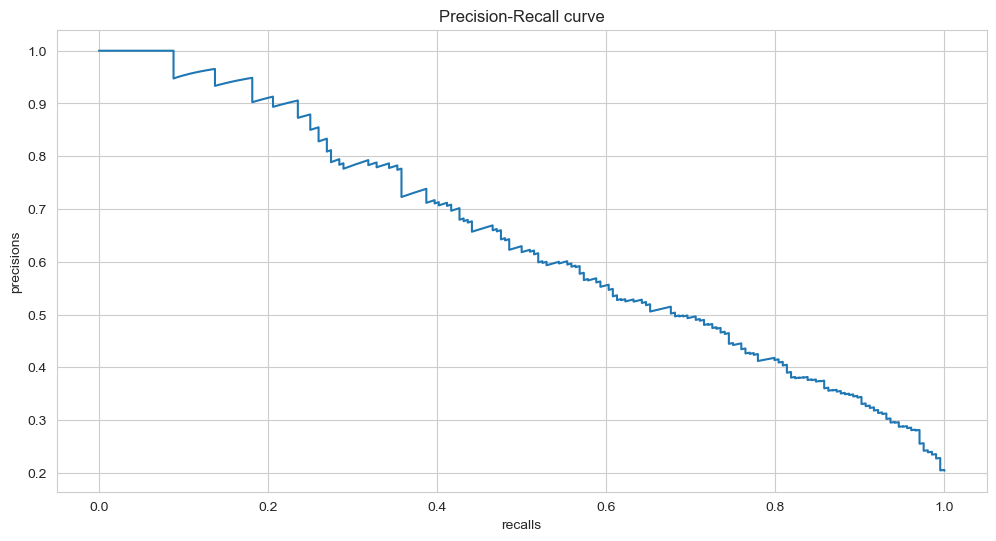

In [34]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir

In [35]:
average_precision_score(y_test, y_pred_proba)

0.6440339505516187

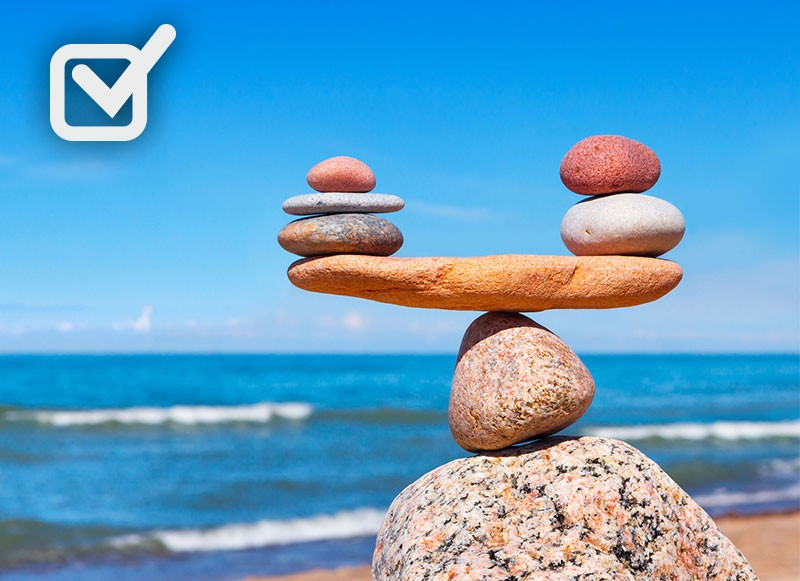

### with class_weigth

In [36]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

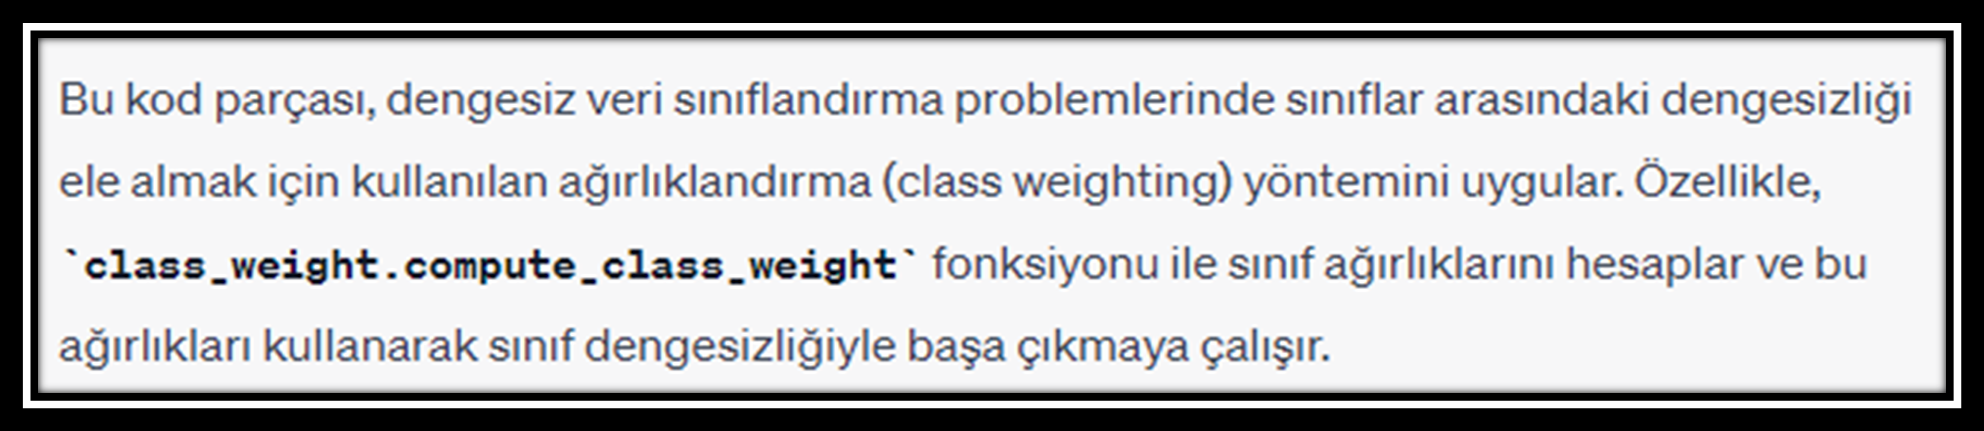

In [37]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

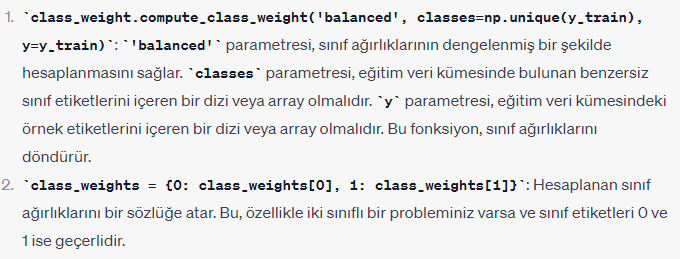

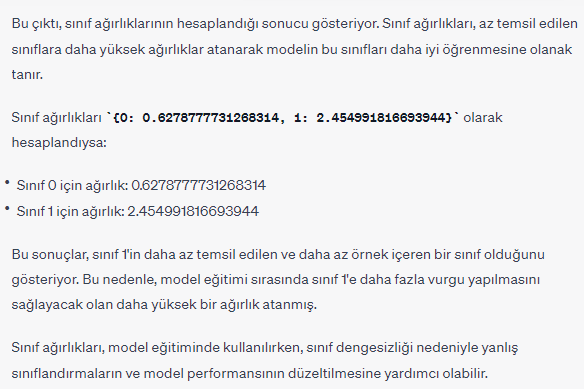

In [38]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - Recall: 0.6422 - loss: 0.6923 - val_Recall: 0.5691 - val_loss: 0.5250
Epoch 2/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7038 - loss: 0.5892 - val_Recall: 0.7845 - val_loss: 0.4606
Epoch 3/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7331 - loss: 0.5521 - val_Recall: 0.8066 - val_loss: 0.4644
Epoch 4/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7611 - loss: 0.5176 - val_Recall: 0.8343 - val_loss: 0.4623
Epoch 5/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7255 - loss: 0.5066 - val_Recall: 0.7956 - val_loss: 0.4615
Epoch 6/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7377 - loss: 0.4974 - val_Recall: 0.8066 - val_loss: 0.4774
Epoch 7/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7619 - loss: 0.4841 - val_Recall: 0.8122 - val_loss: 0.4178
Epoch 8/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7462 - loss: 0.4859 - val_Recall: 0.7680 - val_loss: 0.4457

<Axes: >

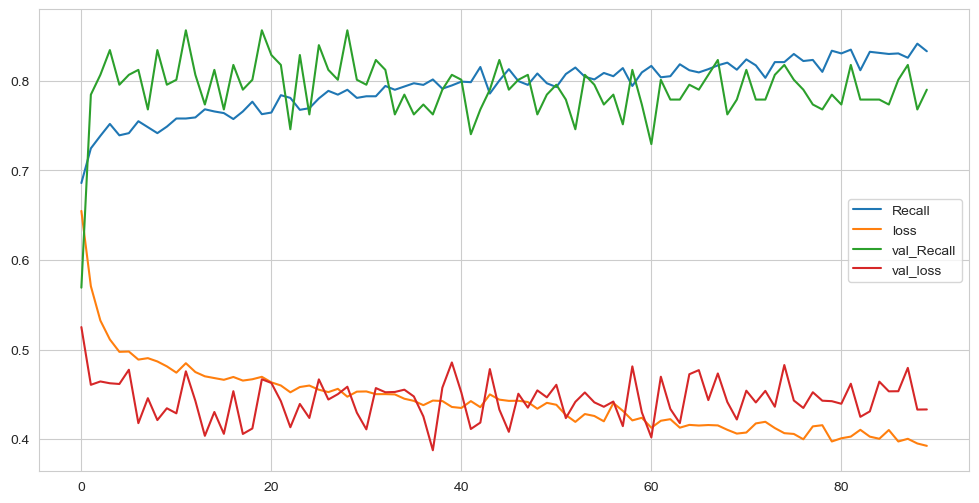

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [40]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
[[645 151]
 [ 53 151]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.50      0.74      0.60       204

    accuracy                           0.80      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.80      0.81      1000



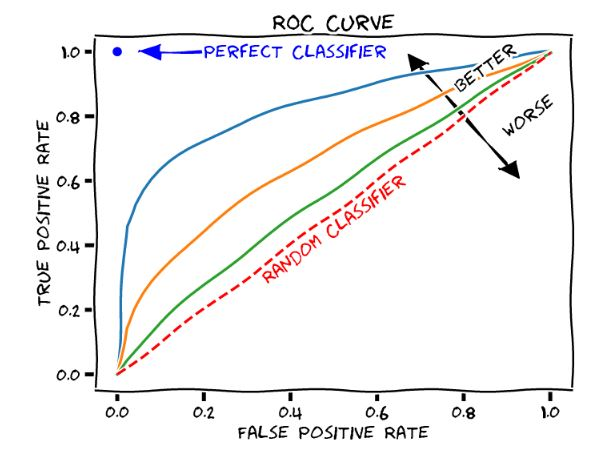

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


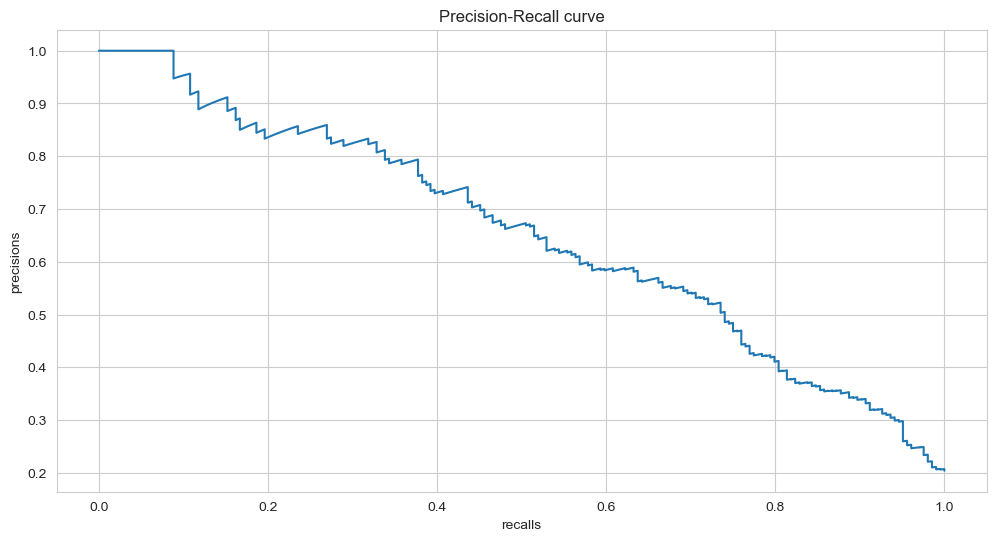

In [41]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir

In [42]:
average_precision_score(y_test, y_pred_proba)   #0.692983743350624

0.6534832812455261

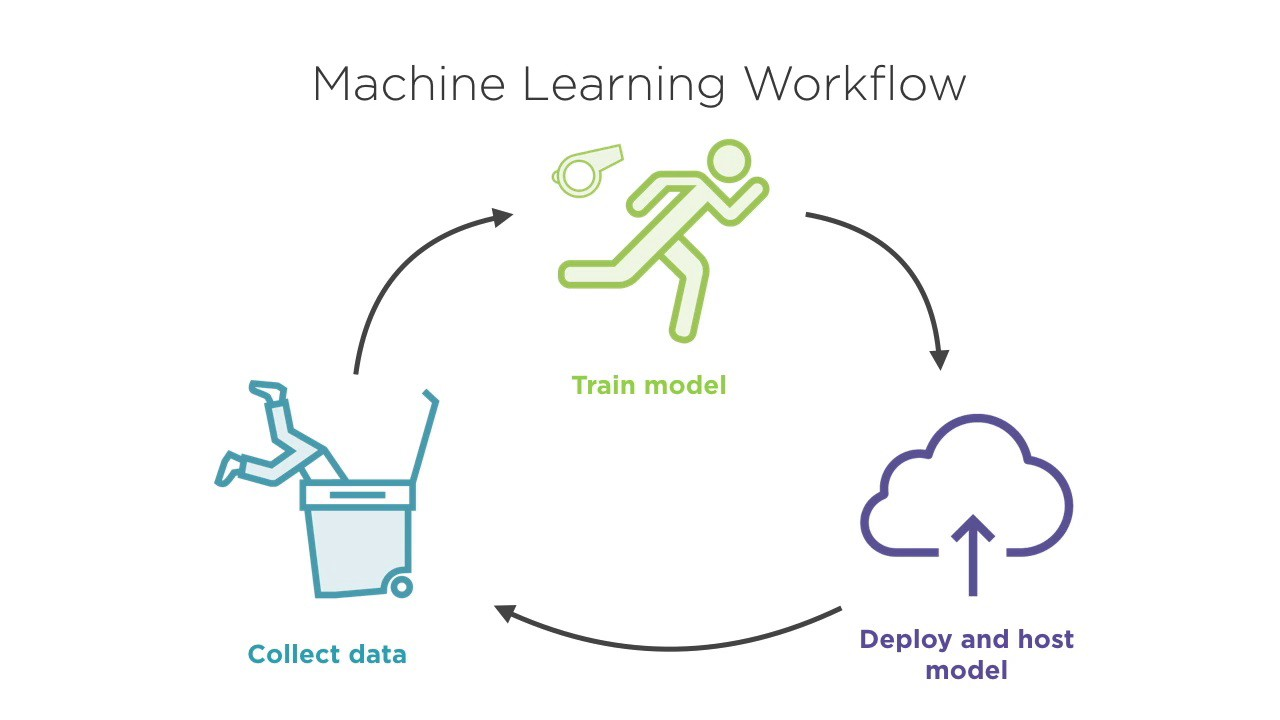

## Final Model and Model Deployment

In [43]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

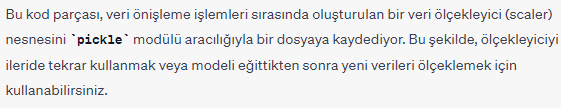

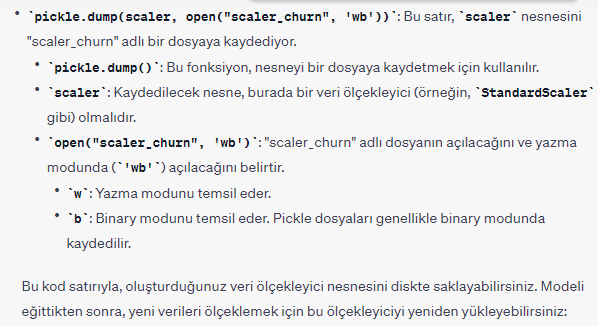

In [44]:
scaler = MinMaxScaler().fit(X)

In [45]:
X_scaled = scaler.transform(X)

In [47]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [48]:
model.fit(x=X_scaled,
          y=y,
          callbacks=[early_stop],
          batch_size=32,
          validation_split = 0.1,
          epochs=500,
          verbose=1,
          class_weight=class_weights)   

Epoch 1/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - Recall: 0.6268 - loss: 0.7417 - val_Recall: 0.2011 - val_loss: 0.5920
Epoch 2/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.6790 - loss: 0.6189 - val_Recall: 0.6257 - val_loss: 0.5354
Epoch 3/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.7157 - loss: 0.5576 - val_Recall: 0.7654 - val_loss: 0.6017
Epoch 4/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7323 - loss: 0.5453 - val_Recall: 0.7374 - val_loss: 0.5503
Epoch 5/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7455 - loss: 0.5196 - val_Recall: 0.6592 - val_loss: 0.5000
Epoch 6/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7737 - loss: 0.4945 - val_Recall: 0.7318 - val_loss: 0.5664
Epoch 7/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Recall: 0.7460 - loss: 0.5175 - val_Recall: 0.6816 - val_loss: 0.4964
Epoch 8/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Recall: 0.7759 - loss: 0.5132 - val_Recall: 0.6536 - val_loss: 0.4937

<Axes: >

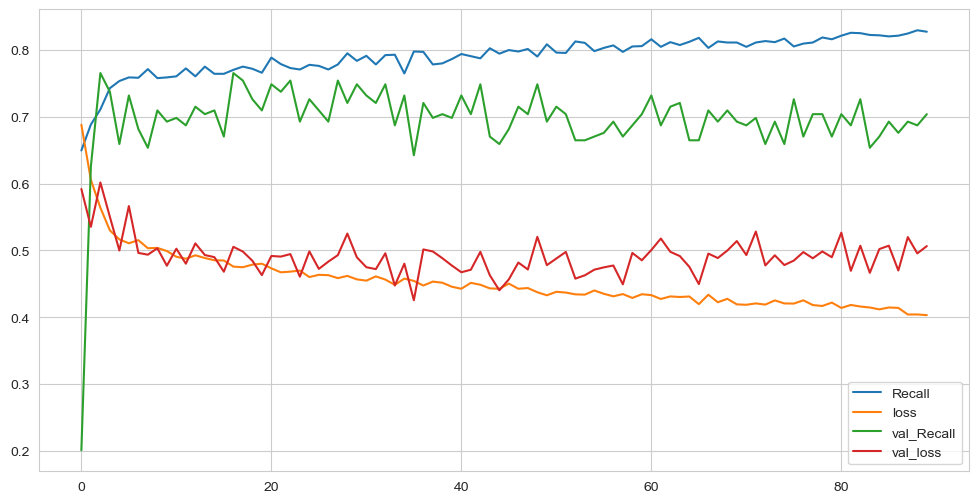

In [49]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [50]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3980295956134796
recall :  0.8382353186607361


In [51]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
[[639 157]
 [ 33 171]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       796
           1       0.52      0.84      0.64       204

    accuracy                           0.81      1000
   macro avg       0.74      0.82      0.76      1000
weighted avg       0.86      0.81      0.82      1000



In [53]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_churn.keras')

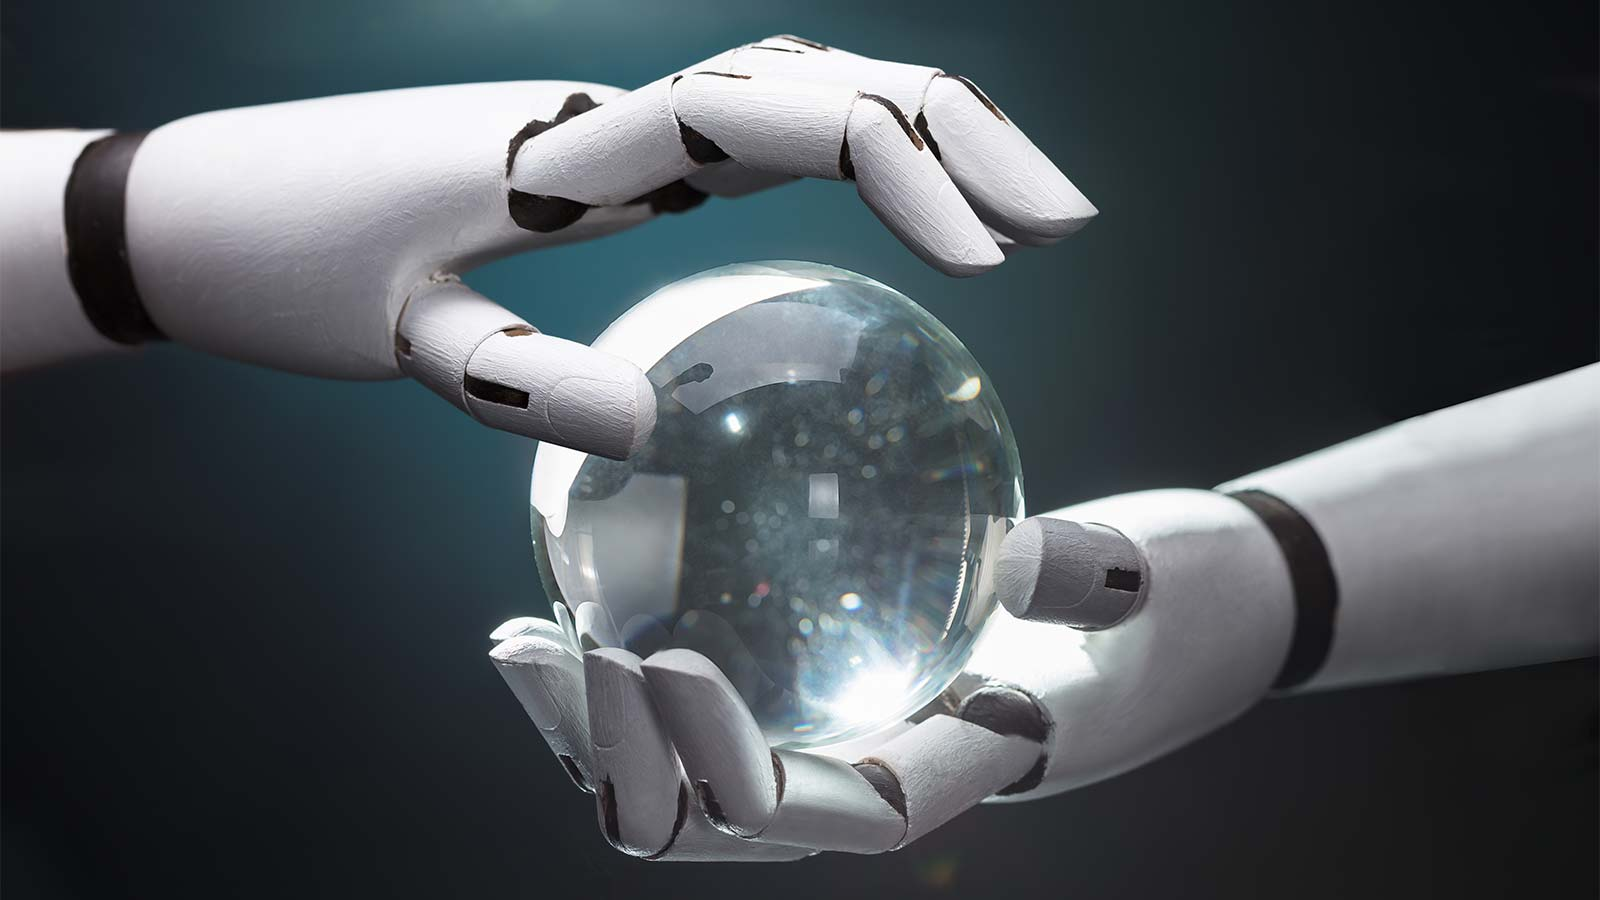

### Prediction

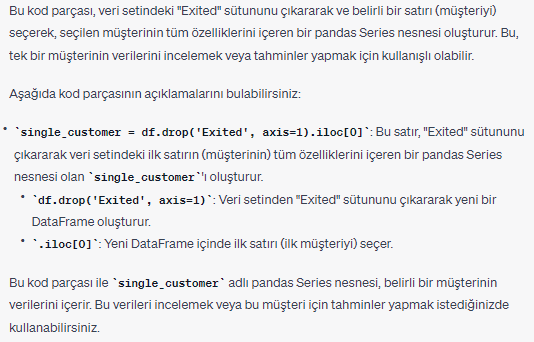

In [54]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore                619
Age                         42
Tenure                       2
Balance                  0.000
NumOfProducts                1
HasCrCard                    1
IsActiveMember               1
EstimatedSalary     101348.880
Geography_Germany        False
Geography_Spain          False
Gender_Male              False
Name: 1, dtype: object

In [55]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

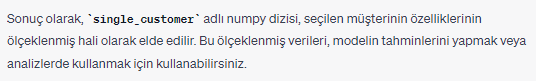

In [56]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0]])

In [57]:
df["Exited"].iloc[0]

1

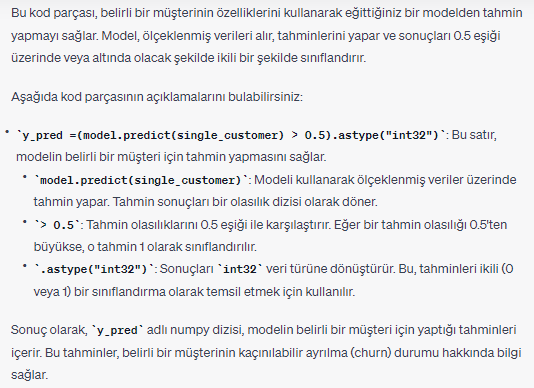

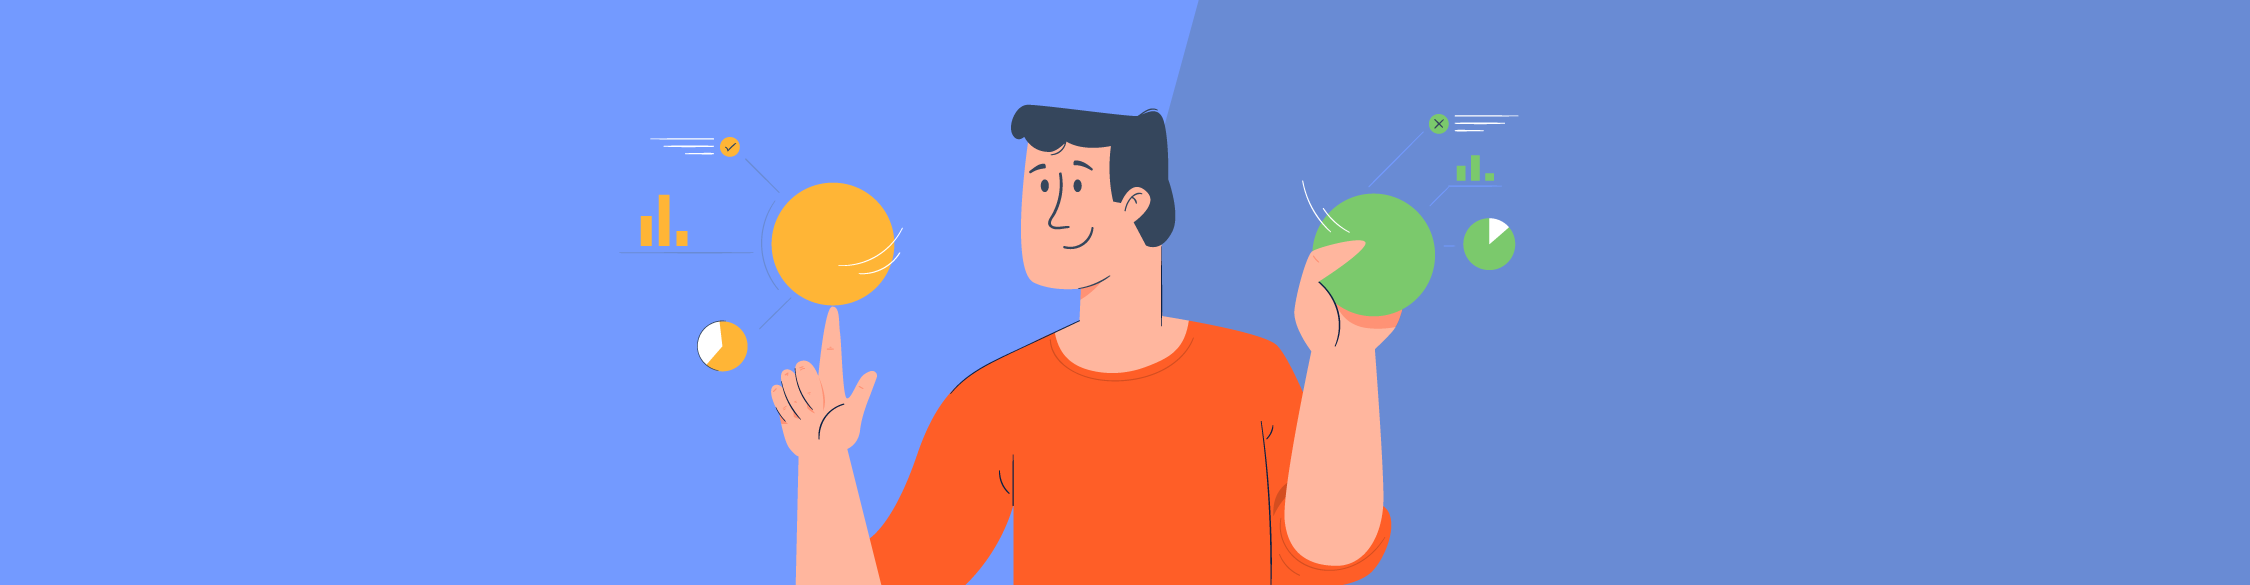

## Comparison with ML

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558 238]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       796
           1       0.37      0.67      0.47       204

    accuracy                           0.69      1000
   macro avg       0.63      0.69      0.63      1000
weighted avg       0.79      0.69      0.72      1000



### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier


In [61]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[768  28]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.76      0.43      0.55       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.85      0.85      0.84      1000



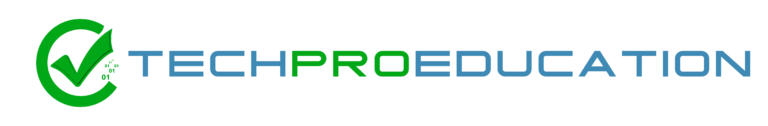